In [1]:
import requests # for getting html of website to scrape 
from bs4 import BeautifulSoup # for scraping html
import csv # for writing .csv file of scraped results 
import pandas as pd # for reading .csv file as dataframe

from IPython.display import Image # for displaying screenshot of website


In [2]:
SEARCH_URL = "https://recipes.lewagon.com/" # url of website to scrape


https://recipes.lewagon.com/?search[query]=chocolate&page=1


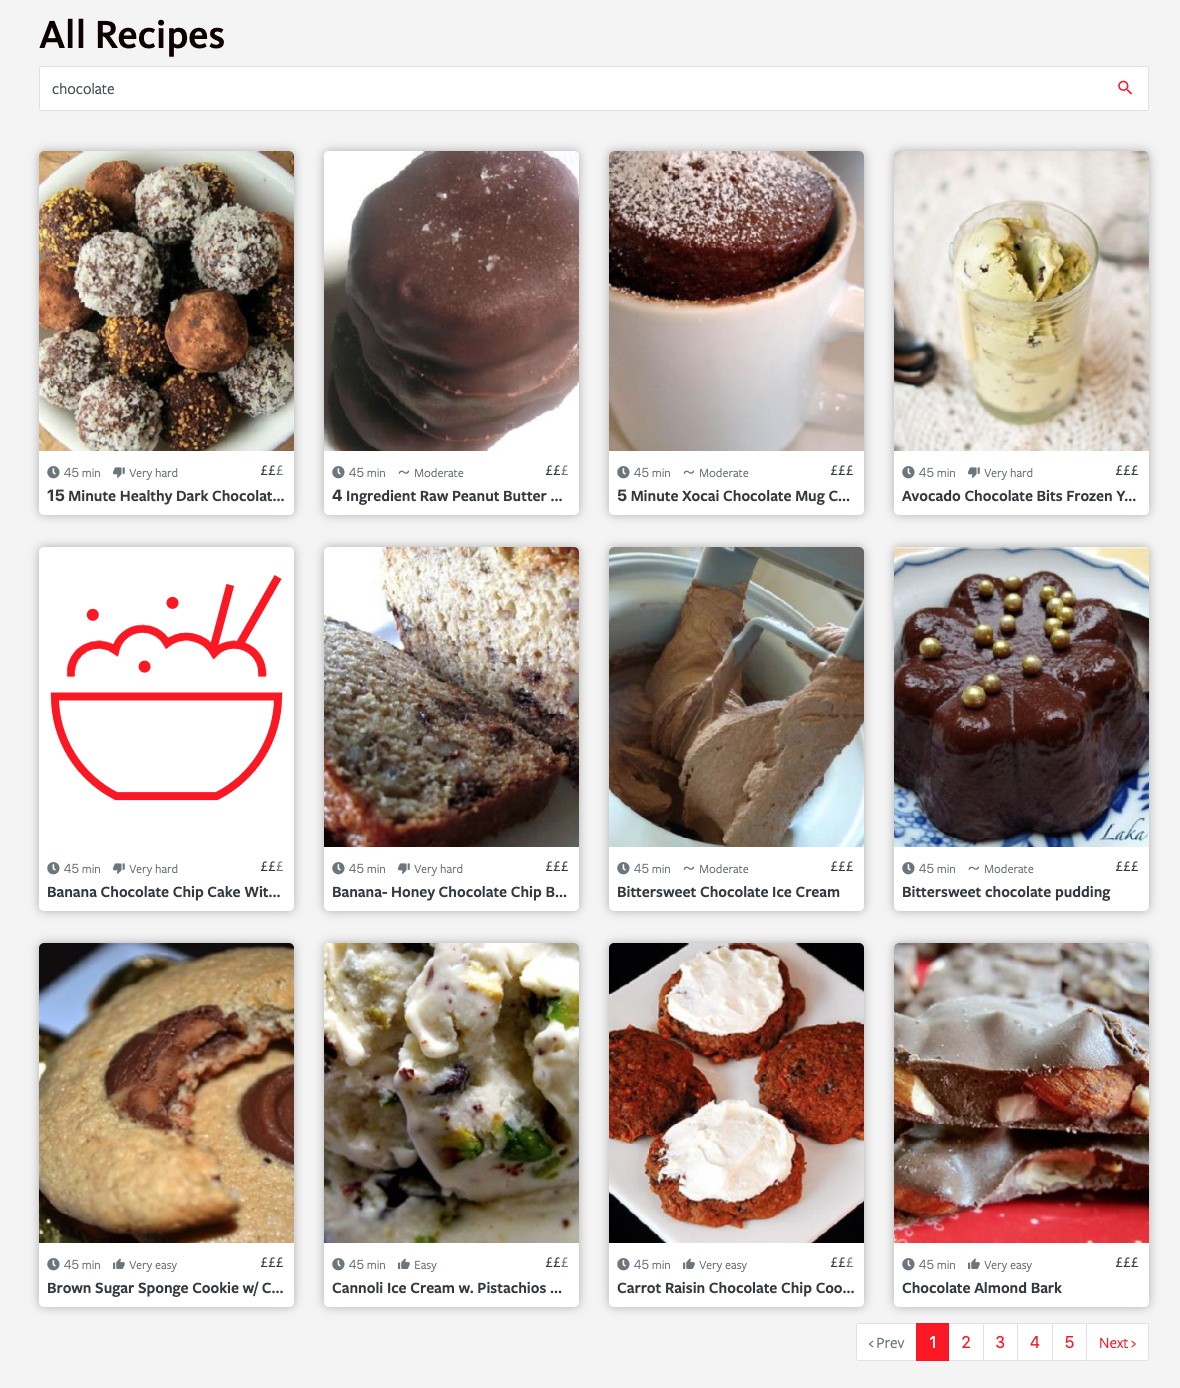

In [3]:
print('https://recipes.lewagon.com/?search[query]=chocolate&page=1')
Image('search_screenshot.png')

# Here's what the first page of results looks like when we search for 'chocolate' recipes:

In [4]:
def scrape_from_internet(INGREDIENT, PAGE=1):
    ''' Use `requests` to get the HTML page of search results for given ingredients. '''
    print(f"Scraping page {PAGE}") # default scrape first page of results 
    response = requests.get(SEARCH_URL, params={'search[query]': INGREDIENT, 'page': PAGE}) # https://recipes.lewagon.com/?search[query]=INGREDIENT&page=PAGE
    if response.history: # We can check the reponse history to see if there is a re-direct...
        print(response.history) # if there is a re-direct response will be '302', this means the page was empty..
        return None # so no html to return.
    return response.text # if there is html to return, return it!


In [5]:
scrape_from_internet('chocolate') # testing it out, retrieves full html of first page of 'chocolate' search results


Scraping page 1


'<!DOCTYPE html>\n<html>\n  <head>\n    <title>Recipes To Scrape - Scrape Recipes with Le Wagon</title>\n    <meta name="description" content="Recipes To Scrape is a website built by Le Wagon to help students learn how to scrape content from a website.">\n\n    <!-- Facebook Open Graph data -->\n    <meta property="og:title" content="Recipes To Scrape - Scrape Recipes with Le Wagon" />\n    <meta property="og:type" content="website" />\n    <meta property="og:url" content="https://recipes.lewagon.com/?search%5Bquery%5D=chocolate&amp;page=1" />\n    <meta property="og:image" content="https://recipes.lewagon.com/assets/cover-f8f5ecc377a75ef1c31b05fcee5164235b101bb92ad1668c1d2c148e6bd56dd6.png" />\n    <meta property="og:description" content="Recipes To Scrape is a website built by Le Wagon to help students learn how to scrape content from a website." />\n    <meta property="og:site_name" content="Recipes To Scrape - Scrape Recipes with Le Wagon" />\n\n    <!-- Twitter Card data -->\n    

In [6]:
scrape_from_internet('chocolate', PAGE=99) # testing out trying to retrieve from a non-existant page. '302' redirect respose, so no html returned


Scraping page 99
[<Response [302]>]


In [7]:
def parse(html):
    ''' return a list of dicts {name, difficulty, prep_time} '''
    soup = BeautifulSoup(html, "html.parser") # parsing html with BeautifulSoup
    recipe_dicts = []
    
    name_list = []
    difficulty_list = []
    prep_time_list = []
    
    # css patterns clue us in to where different information is stored in the html. inspecting the page, we notice...
    
    search = soup.find_all("p", class_="text-dark") # <p class='text-dark'> elements hold recipe names
    for result in search: # so pull their text out and add to 'name_list'
        name_list.append(result.text) 

    search = soup.find_all("span", class_="recipe-difficulty") # <span class='recipe-difficulty'> elements hold difficulty levels
    for result in search: # so pull their text out and add to 'difficulty_list'
        difficulty_list.append(result.text)

    search = soup.find_all("span", class_="recipe-cooktime") # <span class = 'recipe-cooktime'> elements hold prep times
    for result in search: # so pull their text out and add to 'prep_time_list'
        prep_time_list.append(result.text)

    for i in range(len(name_list)): # combine name/difficulty/prep-time lists into dicts, one dict per recipe
        recipe_dicts.append({"name":name_list[i], "difficulty":difficulty_list[i], "prep_time":prep_time_list[i]})

    return recipe_dicts


In [8]:
html = scrape_from_internet('chocolate') # scraping first page of 'chocolate' search results
recipe_dicts = parse(html) # parsing first page of 'chocolate' search results
recipe_dicts


Scraping page 1


[{'name': '15 Minute Healthy Dark Chocolate Truffles',
  'difficulty': 'Very hard',
  'prep_time': '45 min'},
 {'name': '4 Ingredient Raw Peanut Butter Chocolate Cups',
  'difficulty': 'Moderate',
  'prep_time': '45 min'},
 {'name': '5 Minute Xocai Chocolate Mug Cake',
  'difficulty': 'Moderate',
  'prep_time': '45 min'},
 {'name': 'Avocado Chocolate Bits Frozen Yogurt',
  'difficulty': 'Very hard',
  'prep_time': '45 min'},
 {'name': 'Banana Chocolate Chip Cake With Peanut Butter Frosting - gluten free, dairy free, soy free',
  'difficulty': 'Very hard',
  'prep_time': '45 min'},
 {'name': 'Banana- Honey Chocolate Chip Bread',
  'difficulty': 'Very hard',
  'prep_time': '45 min'},
 {'name': 'Bittersweet Chocolate Ice Cream',
  'difficulty': 'Moderate',
  'prep_time': '45 min'},
 {'name': 'Bittersweet chocolate pudding',
  'difficulty': 'Moderate',
  'prep_time': '45 min'},
 {'name': 'Brown Sugar Sponge Cookie w/ Chocolate Covered Caramels',
  'difficulty': 'Very easy',
  'prep_time': 

In [9]:
def write_csv(ingredient, recipe_dicts):
    ''' dump recipes to a CSV file `INGREDIENT.csv` '''
    print(f'Writing recipes to {ingredient}.csv')
    with open(f'{ingredient}.csv', 'w') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=recipe_dicts[0].keys()) # csv headers == column names == dict keys == 'name'/'difficulty'/'prep_time'
        writer.writeheader()
        for recipe in recipe_dicts: # add each recipe from 'recipe_dicts' list to csv as a new row, matching keys ensures values go in correct columns 
            writer.writerow(recipe)
            

In [10]:
html = scrape_from_internet('chocolate') # scraping first page of 'chocolate' search results
recipe_dicts = parse(html) # parsing first page of 'chocolate' search results
write_csv('chocolate', recipe_dicts) # writing csv of parsed recipes 


Scraping page 1
Writing recipes to chocolate.csv


In [11]:
df = pd.read_csv('chocolate.csv') # reading the newly created csv as a dataframe 
df

,name,difficulty,prep_time
0,15 Minute Healthy Dark Chocolate Truffles,Very hard,45 min
1,4 Ingredient Raw Peanut Butter Chocolate Cups,Moderate,45 min
2,5 Minute Xocai Chocolate Mug Cake,Moderate,45 min
3,Avocado Chocolate Bits Frozen Yogurt,Very hard,45 min
4,Banana Chocolate Chip Cake With Peanut Butter ...,Very hard,45 min
5,Banana- Honey Chocolate Chip Bread,Very hard,45 min
6,Bittersweet Chocolate Ice Cream,Moderate,45 min
7,Bittersweet chocolate pudding,Moderate,45 min
8,Brown Sugar Sponge Cookie w/ Chocolate Covered...,Very easy,45 min
9,Cannoli Ice Cream w. Pistachios & Dark Chocolate,Easy,45 min


In [12]:
def full_scrape(INGREDIENT, PAGES_TO_SCRAPE=999):
        ''' putting it all together, scraping full results of ingredient search (not just first page) and dumping recipes to csv` '''
        all_recipe_dicts = [] 
        for page in range(PAGES_TO_SCRAPE): # default attempt to scrape 999 pages?! (way more than actual number of results) 
                                            # it's okay, function will stop scraping when it gets a '302' redirect response, meaning last page reached  
            response = scrape_from_internet(INGREDIENT, page+1) # scrape first page, then second page, etc.
            if response: # if html found...
                all_recipe_dicts += parse(response) # parse the html, add dicts to 'all_recipe_dicts' list
            else: # if no html found, last page reached, so break loop.
                break
        write_csv(INGREDIENT, all_recipe_dicts) # write csv of recipes in 'all_recipe_dicts' list
        df = pd.read_csv(f'{INGREDIENT}.csv') # read the csv as a dataframe
        return df

In [13]:
full_scrape('chocolate') # trying it out all together
                         # now we see all 6 'chocolate' search result pages were scraped, not just the first one!


Scraping page 1
Scraping page 2
Scraping page 3
Scraping page 4
Scraping page 5
Scraping page 6
[<Response [302]>]
Writing recipes to chocolate.csv


,name,difficulty,prep_time
0,15 Minute Healthy Dark Chocolate Truffles,Very hard,45 min
1,4 Ingredient Raw Peanut Butter Chocolate Cups,Moderate,45 min
2,5 Minute Xocai Chocolate Mug Cake,Moderate,45 min
3,Avocado Chocolate Bits Frozen Yogurt,Very hard,45 min
4,Banana Chocolate Chip Cake With Peanut Butter ...,Very hard,45 min
5,Banana- Honey Chocolate Chip Bread,Very hard,45 min
6,Bittersweet Chocolate Ice Cream,Moderate,45 min
7,Bittersweet chocolate pudding,Moderate,45 min
8,Brown Sugar Sponge Cookie w/ Chocolate Covered...,Very easy,45 min
9,Cannoli Ice Cream w. Pistachios & Dark Chocolate,Easy,45 min


In [14]:
## try it yourself! input name of ingredient in field below and press 'enter'

full_scrape(input())


carrot
Scraping page 1
Scraping page 2
[<Response [302]>]
Writing recipes to carrot.csv


,name,difficulty,prep_time
0,Beef Carrot Stew,Very easy,45 min
1,"Best Carrot Cake"" With Cream Cheese Icing",Very hard,45 min
2,Carrot Cake Muffin Cookies,Hard,45 min
3,Carrot Cake Snack Bites,Very hard,45 min
4,Carrot Quinoa Muffins,Very easy,45 min
5,Carrot Raisin Chocolate Chip Cookies,Very easy,45 min
6,Classic Carrot Cake With Cream Cheese Frosting,Hard,45 min
7,Coconut Carrot-Ginger Soup,Moderate,45 min
8,Roasted Butterflied Chicken w. Onions & Carrots,Moderate,45 min
9,Rum Raisin Carrot Cake with Cream Cheese Frosting,Very easy,45 min
